The Search for New Earths

The data describe the change in flux (light intensity) of several thousand stars. Each star has a binary label of 2 or 1. 2 indicated that that the star is confirmed to have at least one exoplanet in orbit; some observations are in fact multi-planet systems.

As you can imagine, planets themselves do not emit light, but the stars that they orbit do. If said star is watched over several months or years, there may be a regular 'dimming' of the flux (the light intensity). This is evidence that there may be an orbiting body around the star; such a star could be considered to be a 'candidate' system. Further study of our candidate system, for example by a satellite that captures light at a different wavelength, could solidify the belief that the candidate can in fact be 'confirmed'.


Source: https://www.kaggle.com/datasets/keplersmachines/kepler-labelled-time-series-data?resource=download

# Importing Dataset and libraries

In [ ]:
import numpy as np
import pandas as pd
import os

train_data = pd.read_csv("/content/drive/MyDrive/exoTrain.csv", on_bad_lines='skip')
test_data = pd.read_csv("/content/drive/MyDrive/exoTest.csv", on_bad_lines='skip')
train_data.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


Importing libraries

In [ ]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
from pylab import rcParams
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn.metrics import recall_score, precision_score, classification_report,accuracy_score,confusion_matrix, roc_curve, auc, roc_curve,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, normalize
from scipy import ndimage
import seaborn as sns

# Descriptive statistics of the dataset

In [ ]:
label = {2: 1,1: 0}
train_data.LABEL = [label[item] for item in train_data.LABEL]
test_data.LABEL = [label[item] for item in test_data.LABEL]

In [ ]:
train_data.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,0.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,0.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,0.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,0.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,0.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,1.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


There are no missing values across the dataset

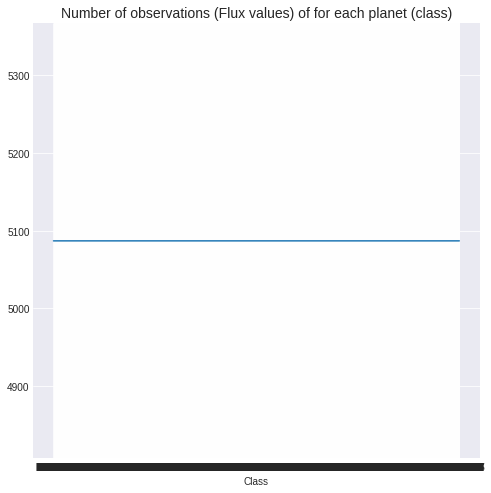

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Number of observations (Flux values) of for each planet (class)', fontsize=14)
plt.xlabel("Class")
plt.plot(train_data.count())

Standard deviaton has sinusoidal shape on non-exoplanet stars


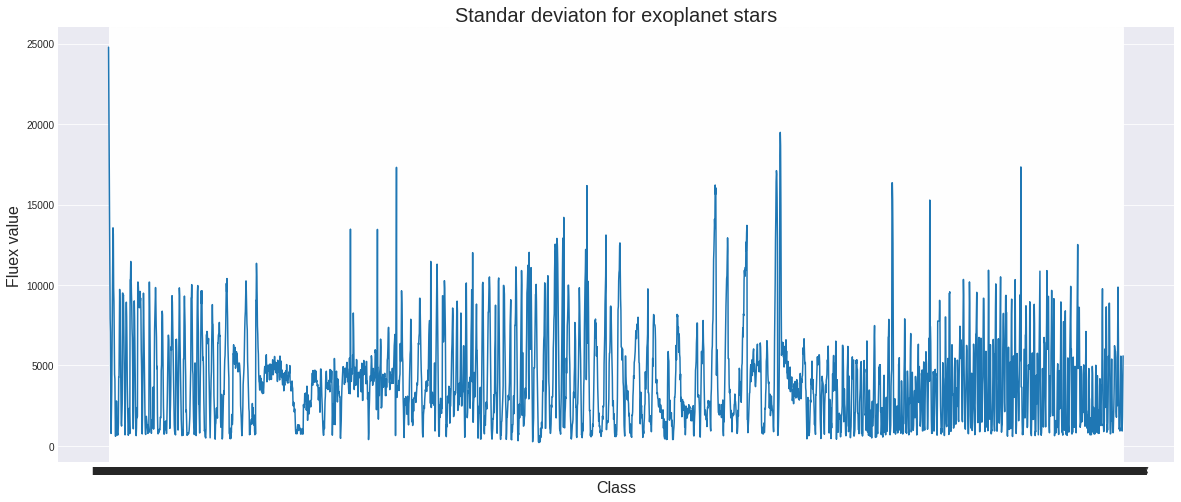

In [ ]:
dataframe = train_data.drop("LABEL",axis=1)
labels = train_data.LABEL
plt.figure(figsize=(20,8))
plt.title('Standar deviaton for exoplanet stars', fontsize=20)
plt.xlabel("Class", fontsize=16)
plt.ylabel("Fluex value", fontsize=16)
plt.plot(dataframe[labels==1].std())

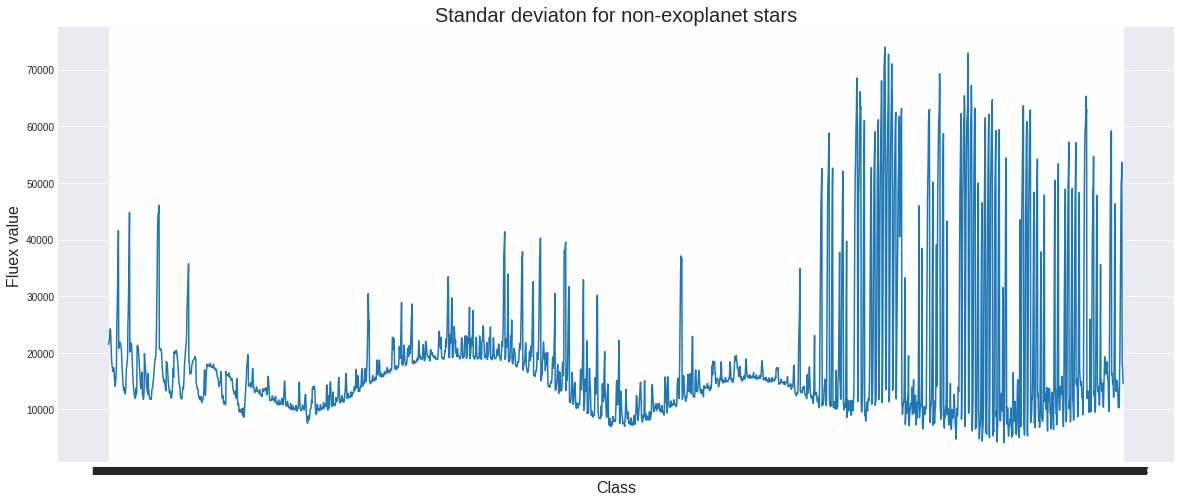

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Standar deviaton for non-exoplanet stars', fontsize=20)
plt.xlabel("Class", fontsize=16)
plt.ylabel("Fluex value", fontsize=16)
train_data[labels==0].value_counts()
plt.plot(dataframe[labels==0].std())

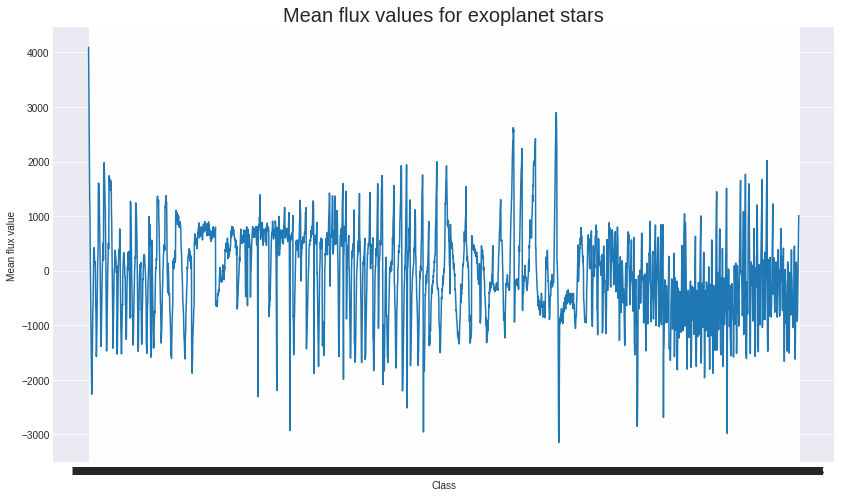

In [ ]:
plt.figure(figsize=(14,8))
plt.title('Mean flux values for exoplanet stars', fontsize=20)
plt.xlabel("Class")
plt.ylabel("Mean flux value")
plt.plot(dataframe[labels==1].mean())

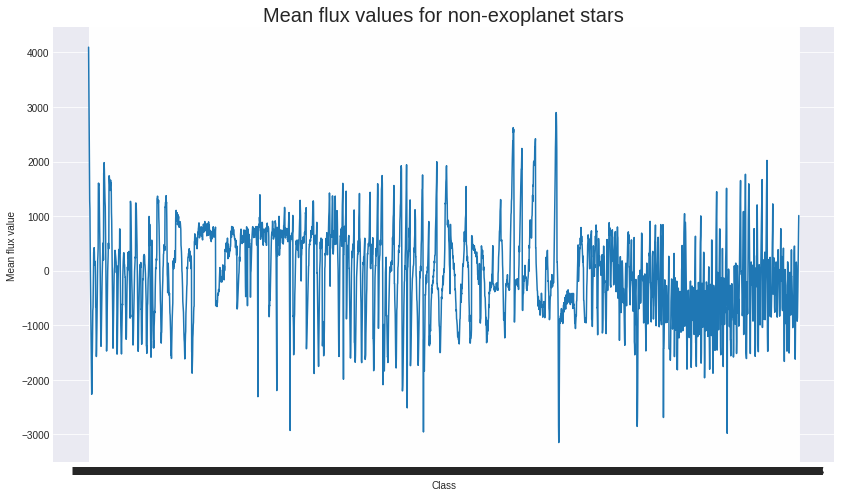

In [ ]:
plt.figure(figsize=(14,8))
plt.title('Mean flux values for non-exoplanet stars', fontsize=20)
plt.xlabel("Class")
plt.ylabel("Mean flux value")
plt.plot(dataframe[labels==1].mean())

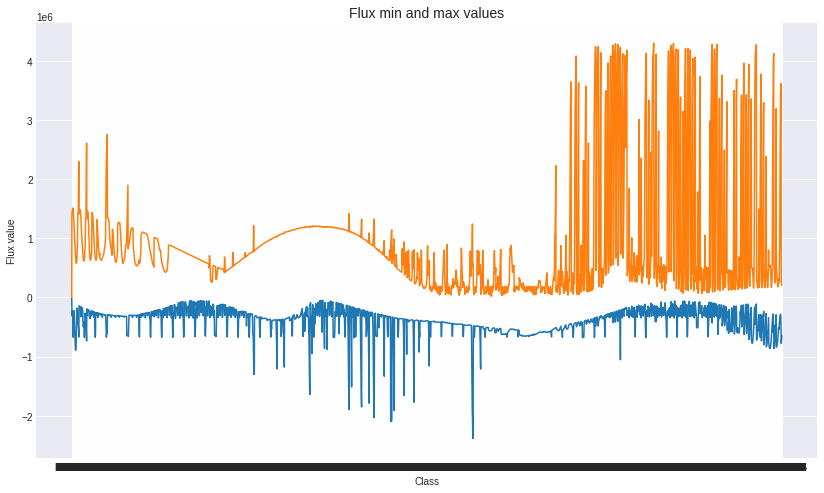

In [ ]:
plt.figure(figsize=(14,8))
plt.title('Flux min and max values', fontsize=14)
plt.xlabel("Class")
plt.ylabel("Flux value")
plt.plot(train_data.min())
plt.plot(train_data.max())

In [ ]:
train_data['LABEL'].value_counts()

0    5050
1      37
Name: LABEL, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, '0: Not Exoplanet || 1: Exoplanet')

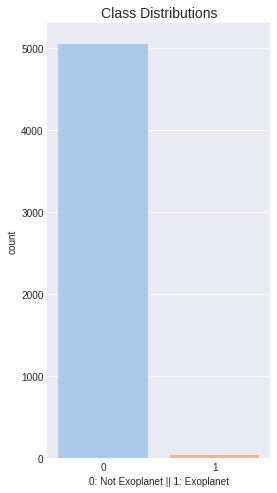

In [ ]:
plt.figure(figsize=(4,8))
colors = ["0", "1"]
sns.countplot('LABEL', data=train_data, palette = "pastel")
plt.title('Class Distributions', fontsize=14)
plt.xlabel("0: Not Exoplanet || 1: Exoplanet")

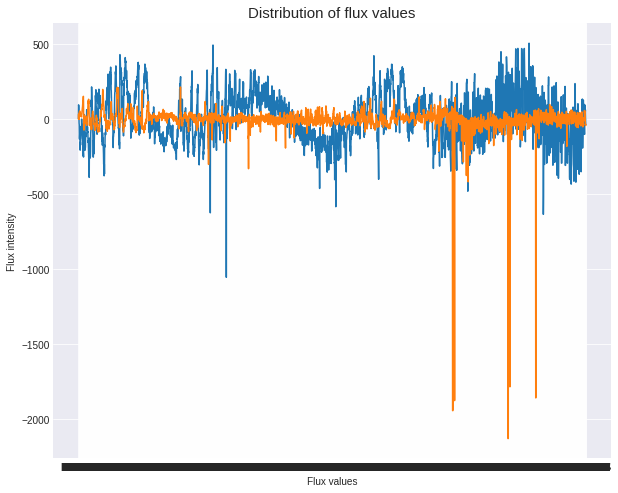

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Distribution of flux values', fontsize=15)
plt.xlabel('Flux values')
plt.ylabel('Flux intensity')
plt.plot(train_data.iloc[0,], label='exoplanet star')
plt.plot(train_data.iloc[100,], label='non-exoplanet star')
plt.show()

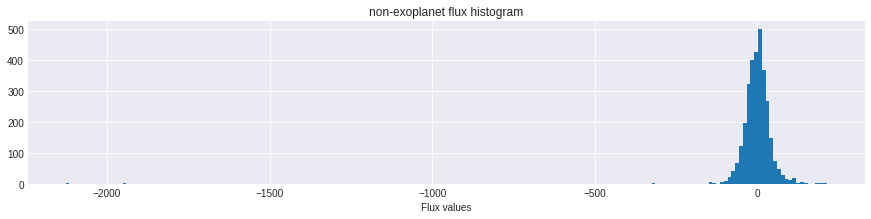

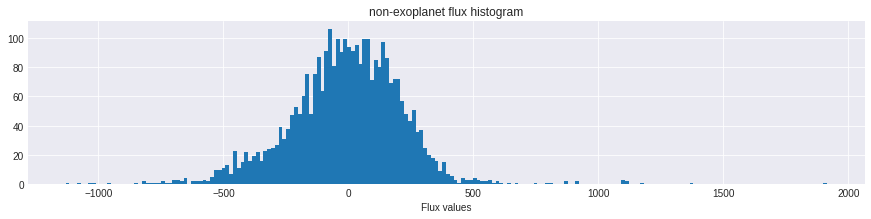

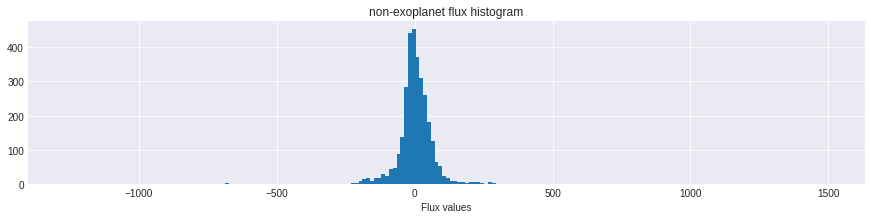

In [ ]:
labels_1=[100,200,300]
for i in labels_1:
    plt.figure(figsize=(15,3))
    plt.hist(train_data.iloc[i,:], bins=200)
    plt.title("non-exoplanet flux histogram")
    plt.xlabel("Flux values")
    plt.show()

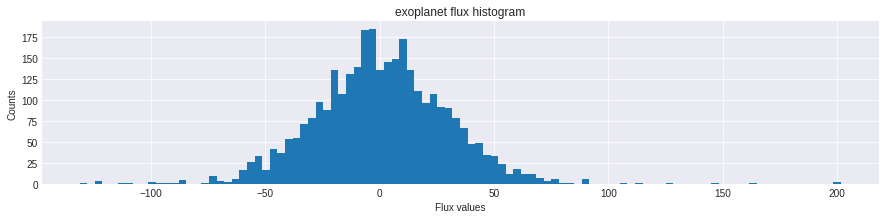

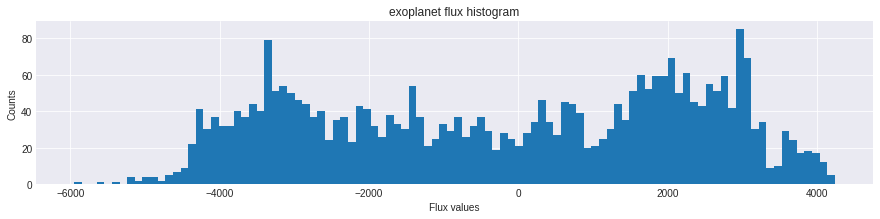

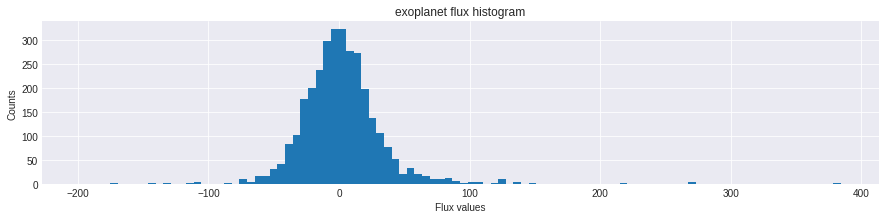

In [ ]:
labels_1=[16,21,25]
for i in labels_1:
    plt.figure(figsize=(15,3))
    plt.hist(train_data.iloc[i,:], bins=100)
    plt.title("exoplanet flux histogram")
    plt.xlabel("Flux values")
    plt.ylabel("Counts")
    plt.show()

In [ ]:
labels = train_data["LABEL"]
dataframe = train_data.drop("LABEL",axis=1)
labels = train_data.LABEL

# Visualizations of Flux over time for both types of stars

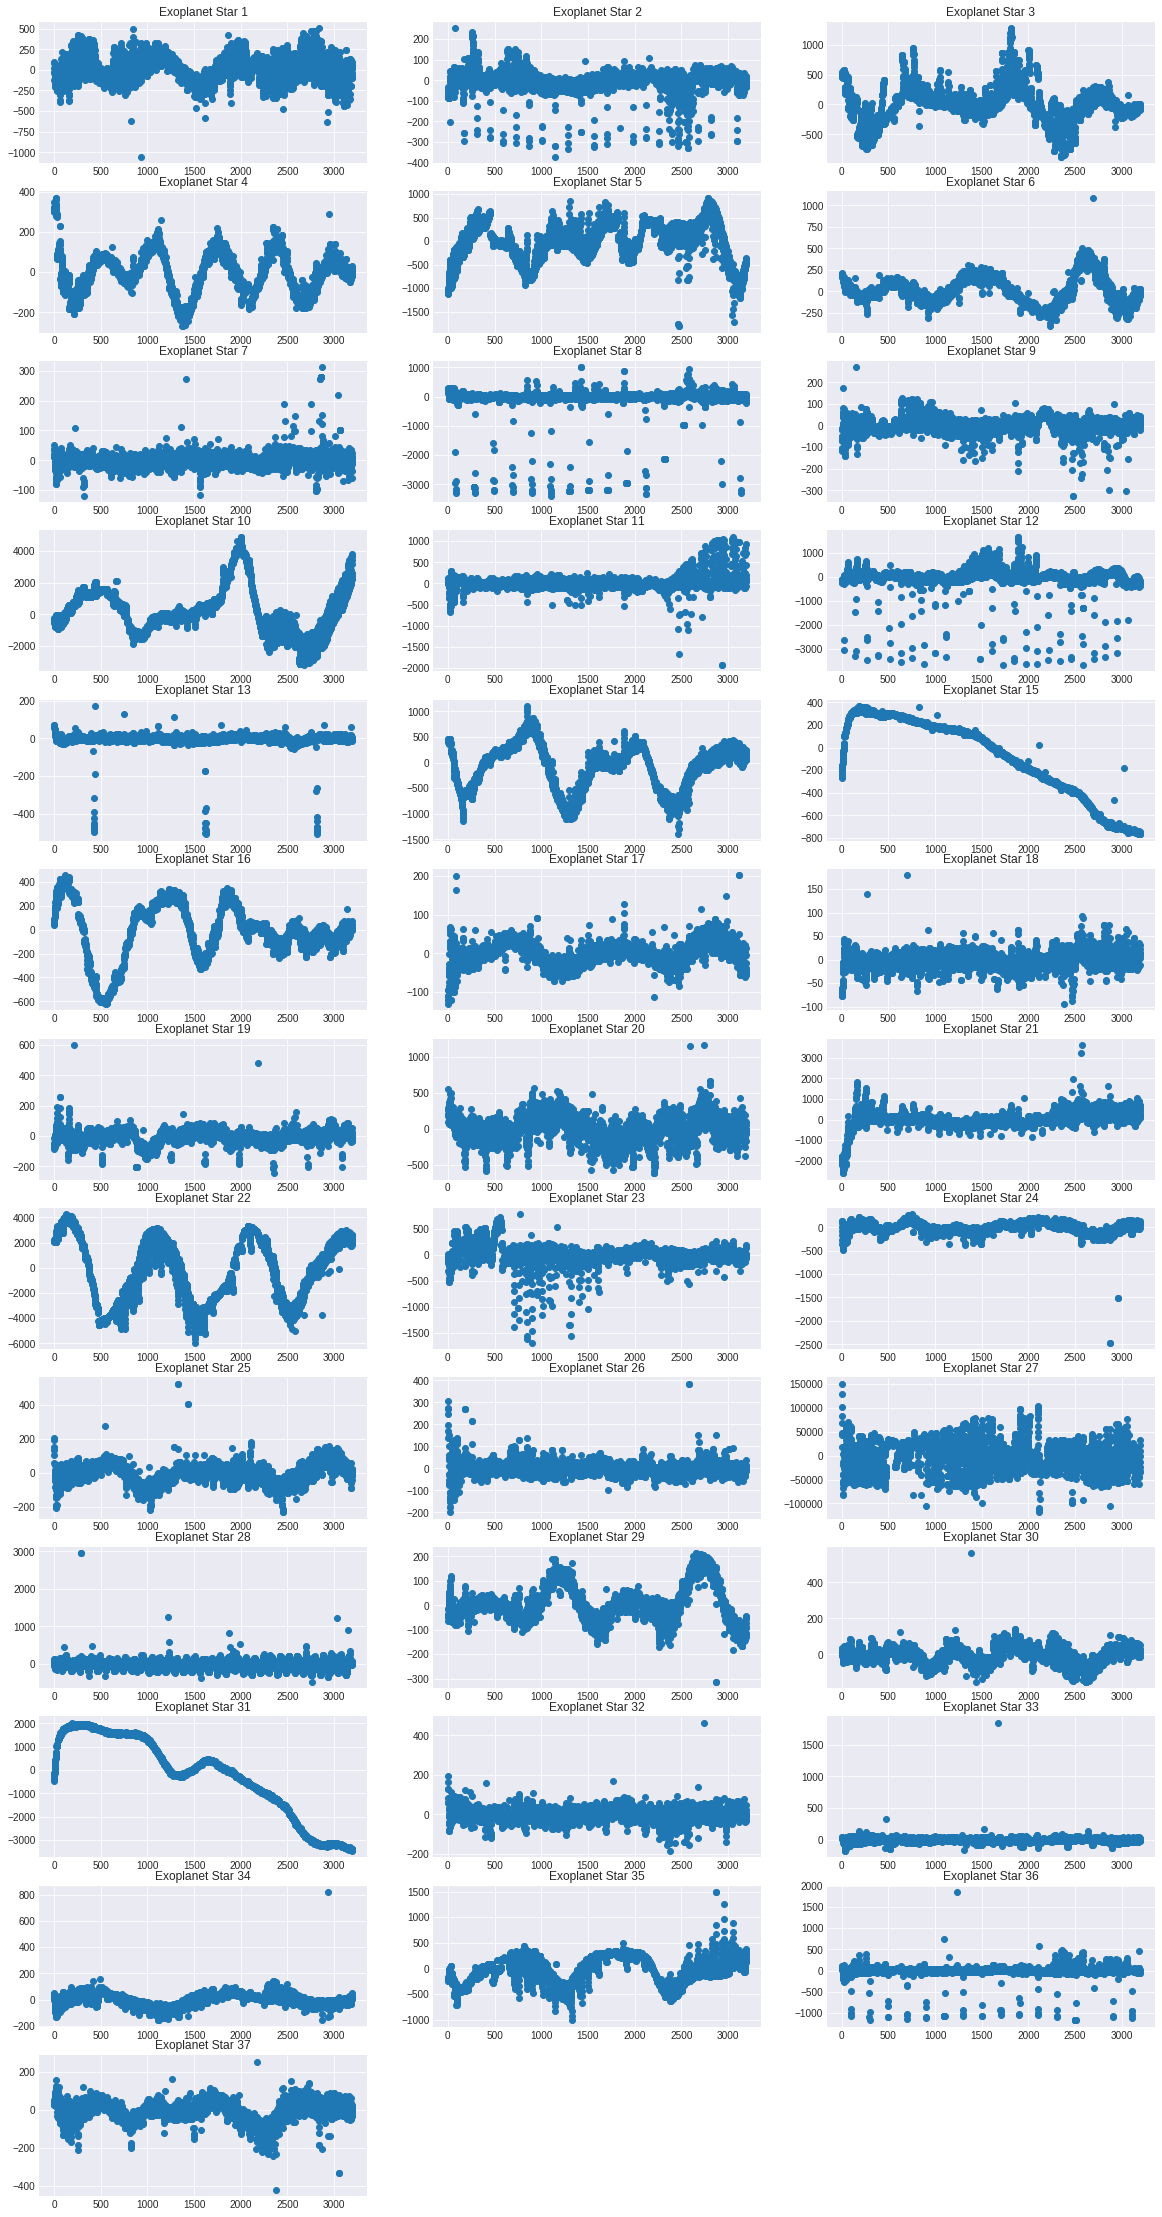

In [ ]:
fig = plt.figure(figsize=(20,40))
x = np.array(range(3197))
for i in range(37):
    ax = fig.add_subplot(13,3,i+1)
    ax.set_title("Exoplanet Star %d" % (i+1))
    ax.scatter(x,dataframe[labels==1].iloc[i,:])

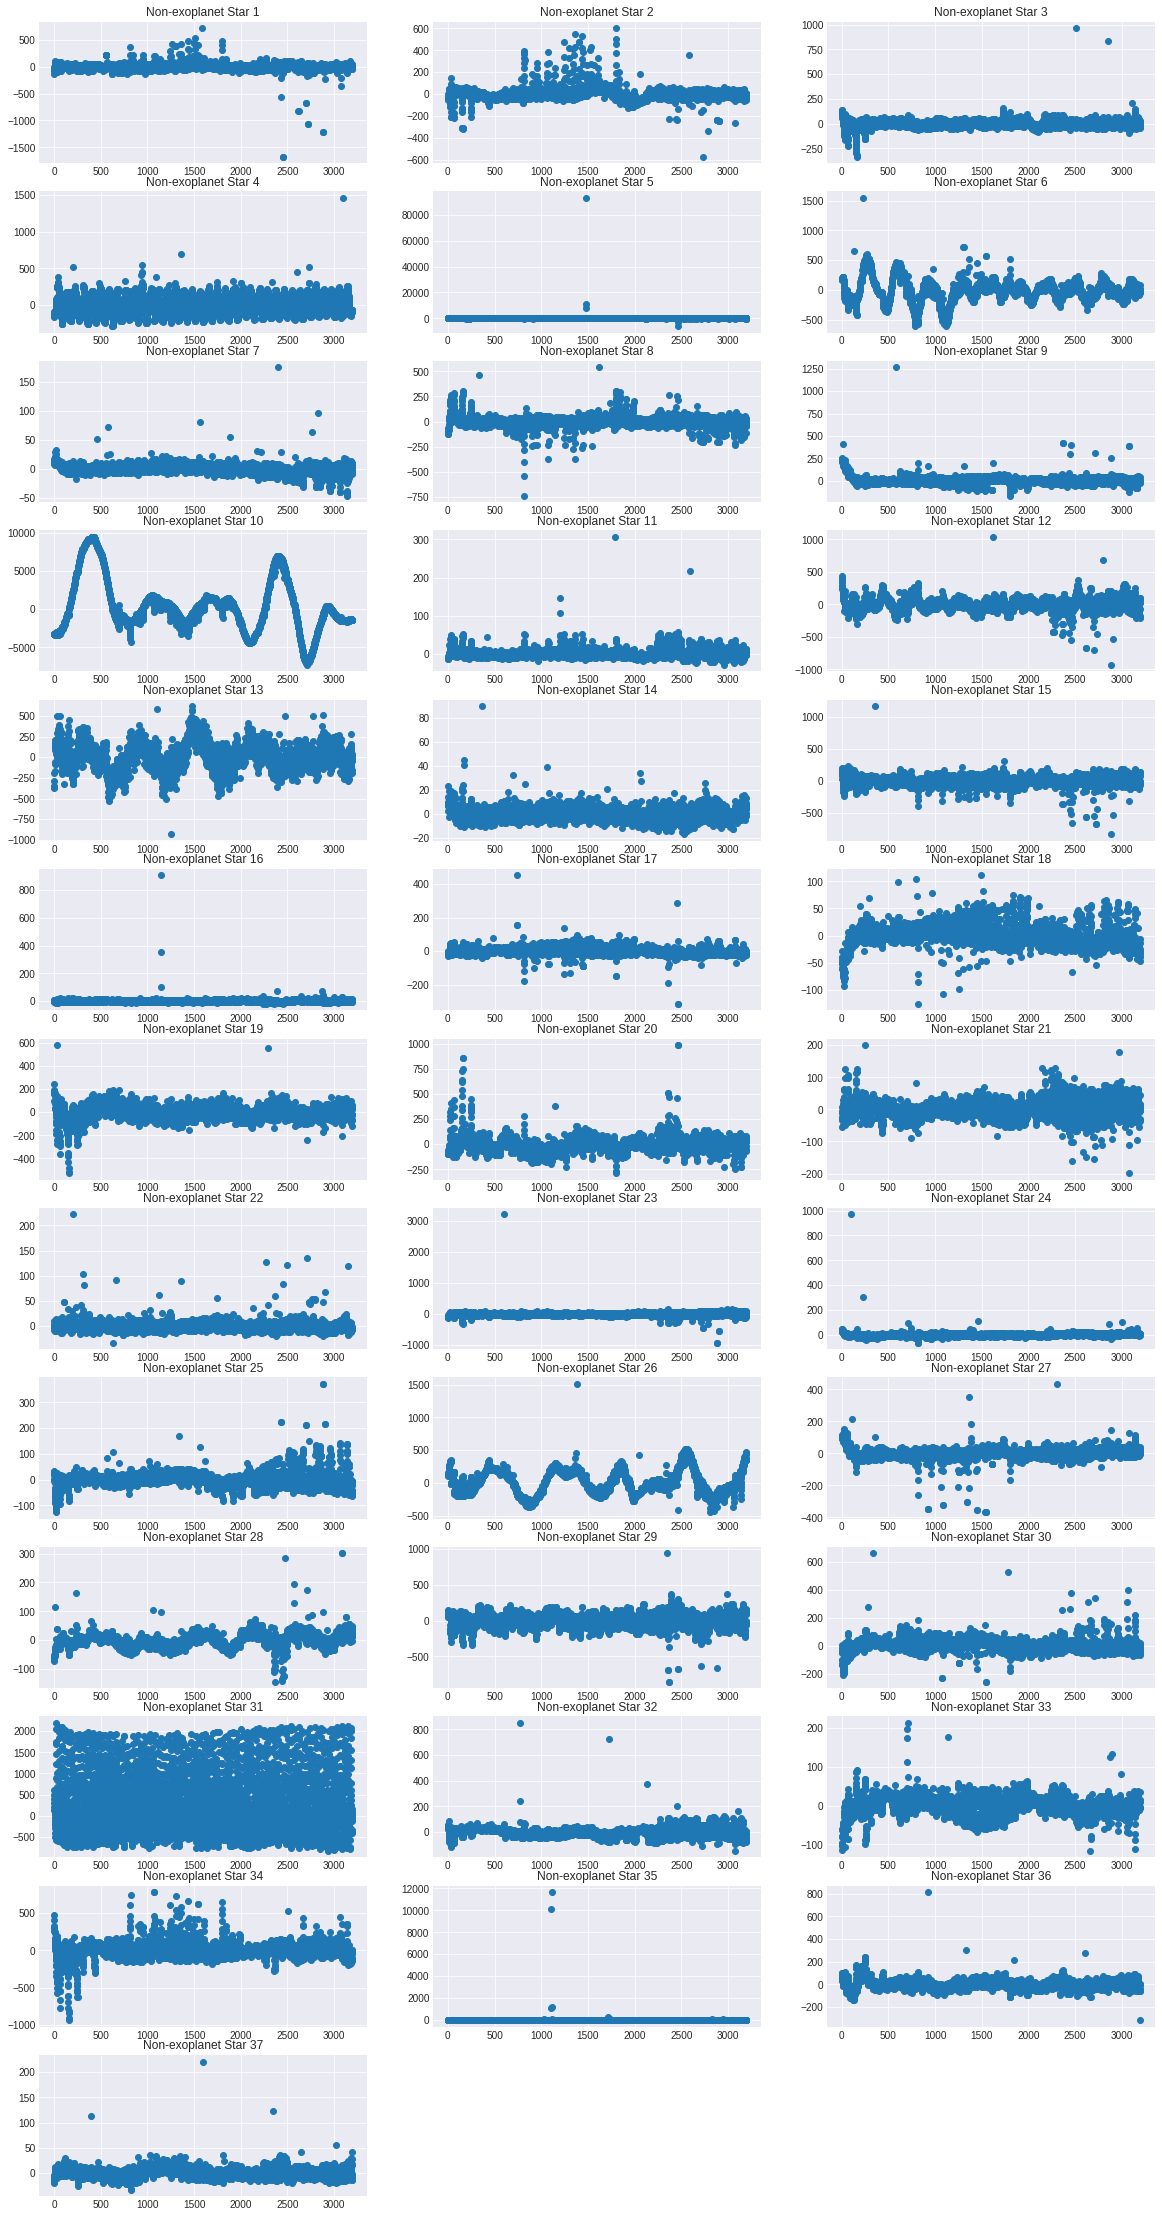

In [ ]:
fig = plt.figure(figsize=(20,40))
x = np.array(range(3197))
for i in range(37):
    ax = fig.add_subplot(13,3,i+1)
    ax.set_title("Non-exoplanet Star %d" % (i+1))
    ax.scatter(x,dataframe[labels==0].iloc[i,:])

# Decision Tree Classifier

In [ ]:
x_train = train_data.drop(["LABEL"],axis=1)
y_train = train_data["LABEL"]   
x_test = test_data.drop(["LABEL"],axis=1)
y_test = test_data["LABEL"]

In [ ]:
x_train = normalized = normalize(x_train)
x_test = normalize(x_test)

The next step is to apply gaussian filters to both test and train.
It applies de-noising algorithms to remove artefacts generated by the telescope


In [ ]:
x_train = filtered = ndimage.filters.gaussian_filter(x_train, sigma=10)
x_test = ndimage.filters.gaussian_filter(x_test, sigma=10)

**precision**
Precision can be seen as a measure of a classifier’s exactness. For each class, it is defined as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”

**recall**
Recall is a measure of the classifier’s completeness; the ability of a classifier to correctly find all positive instances. For each class, it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”

**f1 score**
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

**support**
Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

Source: https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html

Validation accuracy of Decision Tree is 0.9614035087719298

Classification report :
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       565
           1       0.00      0.00      0.00         5

    accuracy                           0.96       570
   macro avg       0.50      0.48      0.49       570
weighted avg       0.98      0.96      0.97       570



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

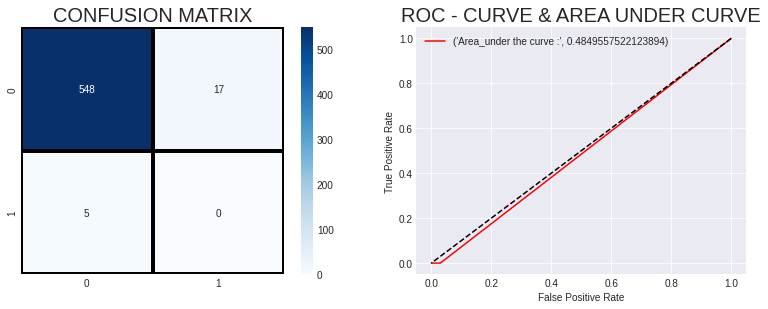

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
ds_model = DecisionTreeClassifier(max_depth=5, random_state=13)
ds_model.fit(x_train,y_train)
prediction=ds_model.predict(x_test)

print('Validation accuracy of Decision Tree is', accuracy_score(prediction,y_test))
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="Blues",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = ds_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

The metrics of classification report are very low for classes labeled as 1 (exoplanet stars). The reason for that is the class distribution imbalance shown earlier: 5500 non-exoplanet to 37 exoplanet stars in the training set. In order to obtain meaningful results SMOTE technique has been used. It stands for Synthetic Minority Oversampling Technique and involves duplicating examples in the minority class, although these examples don’t add any new information to the model

1    5050
0    5050
Name: LABEL, dtype: int64


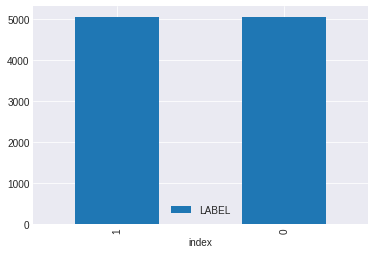

In [ ]:
from imblearn.over_sampling import SMOTE
model = SMOTE()
ov_train_x,ov_train_y = model.fit_resample(train_data.drop('LABEL',axis=1), train_data['LABEL'])
ov_train_y = ov_train_y.astype('int')

ov_train_y.value_counts().reset_index().plot(kind='bar', x='index', y='LABEL')
print(ov_train_y.value_counts())

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(ov_train_x, ov_train_y, test_size=0.33, random_state=42)

Validation accuracy of the Decision Tree is 0.93999399939994

Classification report :
               precision    recall  f1-score   support

           0       0.98      0.90      0.94      1700
           1       0.90      0.98      0.94      1633

    accuracy                           0.94      3333
   macro avg       0.94      0.94      0.94      3333
weighted avg       0.94      0.94      0.94      3333



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

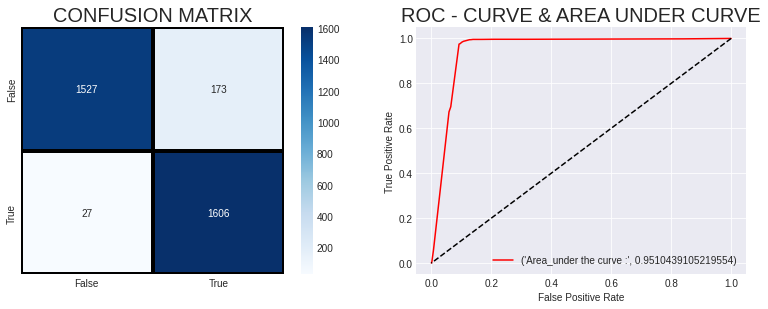

In [ ]:
from sklearn.tree import DecisionTreeClassifier
ds_model = DecisionTreeClassifier(max_depth=5, random_state=13)

ds_model.fit(train_X,train_y)

prediction=ds_model.predict(test_X)

print('Validation accuracy of the Decision Tree is', accuracy_score(prediction,test_y))
print("\nClassification report :\n",(classification_report(test_y,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
cm = sns.heatmap(confusion_matrix(test_y,prediction),annot=True,cmap="Blues",fmt = "d",linecolor="k",linewidths=3)

cm.xaxis.set_ticklabels(['False','True'])
cm.yaxis.set_ticklabels(['False','True'])

plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = ds_model.predict_proba(test_X)[:,1]
fpr,tpr,thresholds = roc_curve(test_y,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

After balancing the dataset the metrics used to evaluate the decision tree classifier are significantly better.